In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf  # Import acf and pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
import numpy as np 
from statsmodels.graphics.tsaplots import acf, pacf 

In [2]:
data = pd.read_excel('/Users/hassanabdelshafi/Downloads/Weather Data 2.xlsx', parse_dates=['Date/Time'], index_col='Date/Time')
temperature = data['Temp_C'] 


In [27]:
import pandas as pd

# Assuming 'data' is your loaded DataFrame
data = pd.read_excel('/Users/hassanabdelshafi/Downloads/Weather Data 2.xlsx', parse_dates=['Date/Time'], index_col='Date/Time')

# Factorize the 'Weather' column
data['Weather_Code'] = pd.factorize(data['Weather'])[0]

# Show the first few rows to verify the changes
data.head()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Weather_Code
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,0


In [3]:
data

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...
12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 2012-01-01 00:00:00 to 12/31/2012 23:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            8784 non-null   float64
 1   Dew Point Temp_C  8784 non-null   float64
 2   Rel Hum_%         8784 non-null   int64  
 3   Wind Speed_km/h   8784 non-null   int64  
 4   Visibility_km     8784 non-null   float64
 5   Press_kPa         8784 non-null   float64
 6   Weather           8784 non-null   object 
 7   Weather_Code      8784 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 617.6+ KB


In [5]:

# Extract the temperature column
temperature = data['Temp_C']

In [6]:

# Assuming 'data' is your DataFrame

# Select only the numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the quantiles for the numeric data
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in the numeric data
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))

# Replace outliers with NaN in the original DataFrame (for numeric columns only)
for col in numeric_data.columns:
    data[col] = data[col].mask(outliers[col])

# Optionally, remove rows with NaN values (which now indicate outliers)
data_cleaned = data.dropna()


In [7]:
from statsmodels.tsa.stattools import adfuller

def check_stationary(timeseries, significance_level=0.05):
    # Perform Augmented Dickey-Fuller test
    adf_test_result = adfuller(timeseries)
    
    # Extract p-value from the test result
    p_value = adf_test_result[1]
    
    # Compare p-value with significance level
    if p_value < significance_level:
        return True  # Time series is stationary
    else:
        return False  # Time series is not stationary


In [8]:

# Check stationarity of temperature data
is_stationary = check_stationary(temperature)



In [9]:
# If data is not stationary, difference the data
if not is_stationary:
    differenced_data = temperature.diff().dropna()
    is_stationary = check_stationary(differenced_data)


In [10]:

# Function to plot ACF and PACF
def plot_acf_pacf(timeseries):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

    acf_values = acf(timeseries)
    pacf_values = pacf(timeseries)
    
    lags = np.arange(len(acf_values))

    ax1.bar(lags, acf_values)
    ax1.axhline(y=0, color='r', linestyle='--', alpha=0.7)
    ax1.axhline(y=1.96/np.sqrt(len(timeseries)), color='r', linestyle='--', alpha=0.7)
    ax1.axhline(y=-1.96/np.sqrt(len(timeseries)), color='r', linestyle='--', alpha=0.7)
    ax1.set_title('Autocorrelation Function')
    ax1.set_xlabel('Lags')
    ax1.set_ylabel('ACF')
    ax1.set_xticks(lags)

    ax2.bar(lags, pacf_values)
    ax2.axhline(y=0, color='r', linestyle='--', alpha=0.7)
    ax2.axhline(y=1.96/np.sqrt(len(timeseries)), color='r', linestyle='--', alpha=0.7)
    ax2.axhline(y=-1.96/np.sqrt(len(timeseries)), color='r', linestyle='--', alpha=0.7)
    ax2.set_title('Partial Autocorrelation Function')
    ax2.set_xlabel('Lags')
    ax2.set_ylabel('PACF')
    ax2.set_xticks(lags)

    plt.tight_layout()
    plt.show()



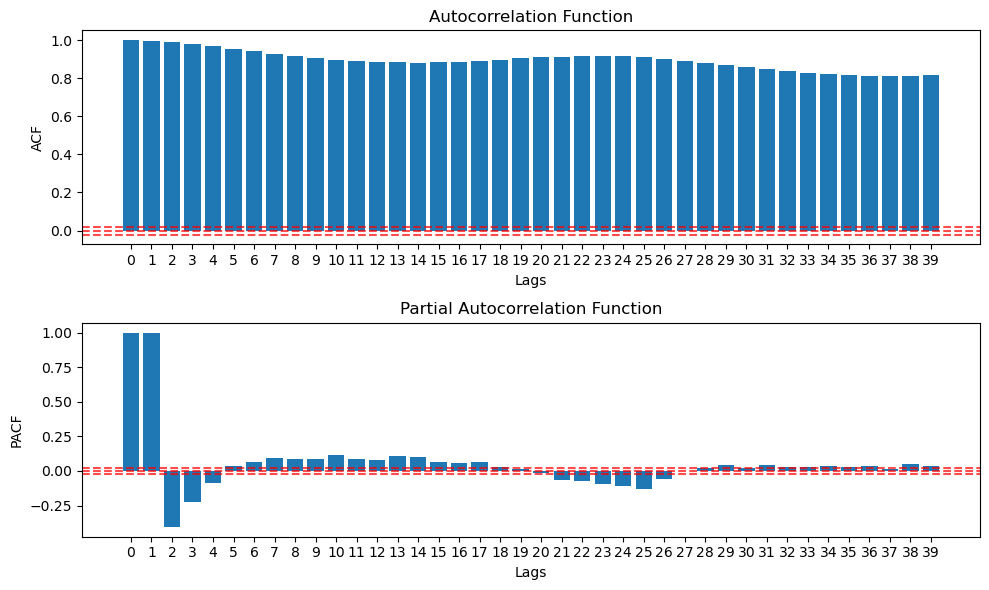

In [23]:

# Plot ACF and PACF for the appropriate dataset
if is_stationary:
    plot_acf_pacf(temperature)
else:
    plot_acf_pacf(differenced_data)

In [12]:
split_point = int(len(temperature) * 0.7)  # 70% of the length of the dataset
train_data = temperature.iloc[:split_point]
test_data = temperature.iloc[split_point:]



In [13]:
# Fit ARIMA model
model = ARIMA(train_data, order=(4, 2, 1))
fitted_model = model.fit()


/Users/hassanabdelshafi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hassanabdelshafi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hassanabdelshafi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
# Make predictions
predictions = fitted_model.predict(start=len(train_data), end=len(temperature) - 1)


/Users/hassanabdelshafi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/hassanabdelshafi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate evaluation metrics
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, predictions)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100


In [39]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Adding a small constant to the actual values to prevent division by zero.
    epsilon = 1e-8
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
    return mape

# Assuming you have y_true and y_pred available
mape = mean_absolute_percentage_error(test_data, forecast_df)

# Diagnostic information
print("Some actual values:", test_data[:5])
print("Some predicted values:", forecast_df[:5])
print(f"MAPE: {mape:.4f}")


Some actual values:                 Temp_C  Press_kPa
Date/Time                        
9/13/2012 4:00    15.5     101.96
9/13/2012 5:00    14.9     102.00
9/13/2012 6:00    15.7     102.02
9/13/2012 7:00    18.1     102.03
9/13/2012 8:00    19.8     102.04
Some predicted values:          Temp_C   Press_kPa
6148  15.968600  101.941573
6149  16.080107  101.936164
6150  16.190626  101.930739
6151  16.300157  101.925297
6152  16.408700  101.919840
MAPE: 235738813.8278


In [49]:
# Print evaluation metrics
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")


MSE: 60.1033
RMSE: 15.1166
MAE: 12.2920
MAPE: 235738813.8278


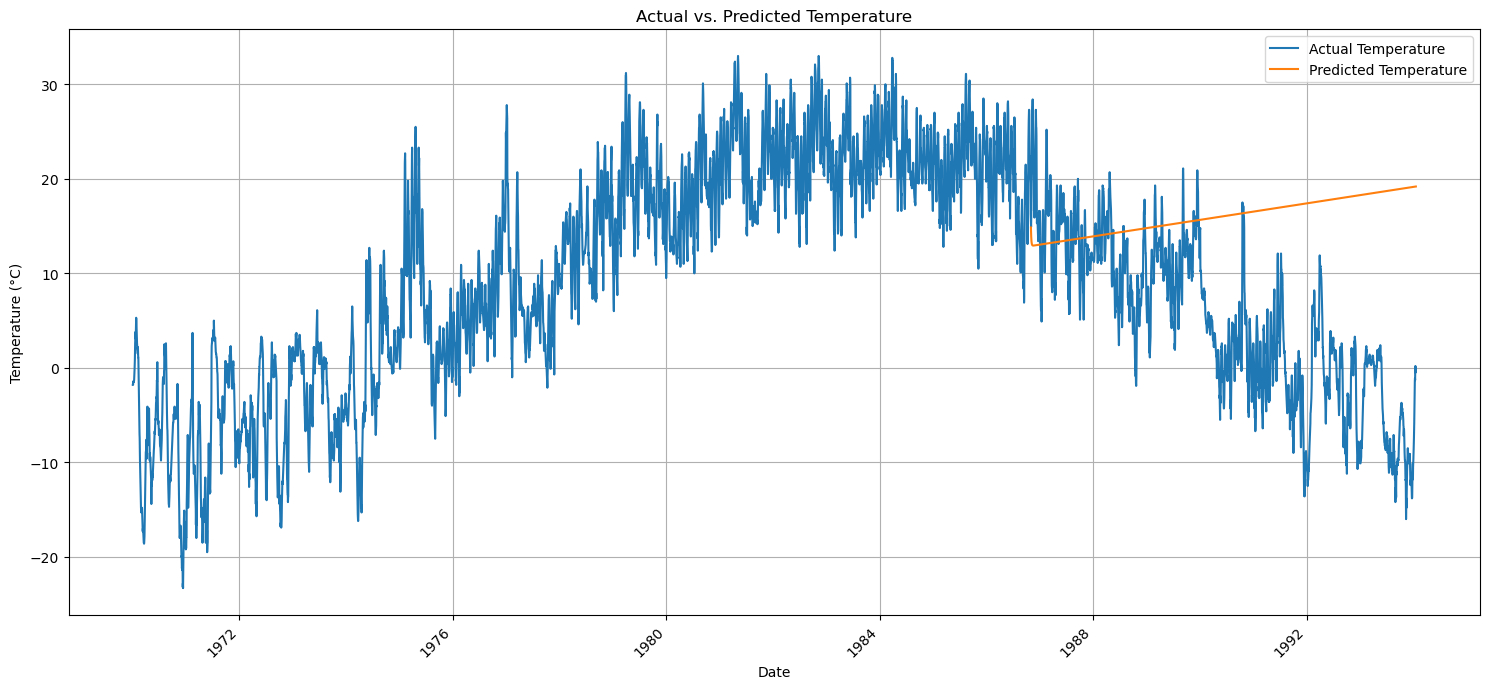

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Adjust figure size
plt.figure(figsize=(15, 7))

# Plot actual vs. predicted values
plt.plot(temperature.index, temperature, label='Actual Temperature')
plt.plot(test_data.index, predictions, label='Predicted Temperature')

# Formatting date axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to fit everything
plt.show()


In [20]:
plt.show()

/Users/hassanabdelshafi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/hassanabdelshafi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


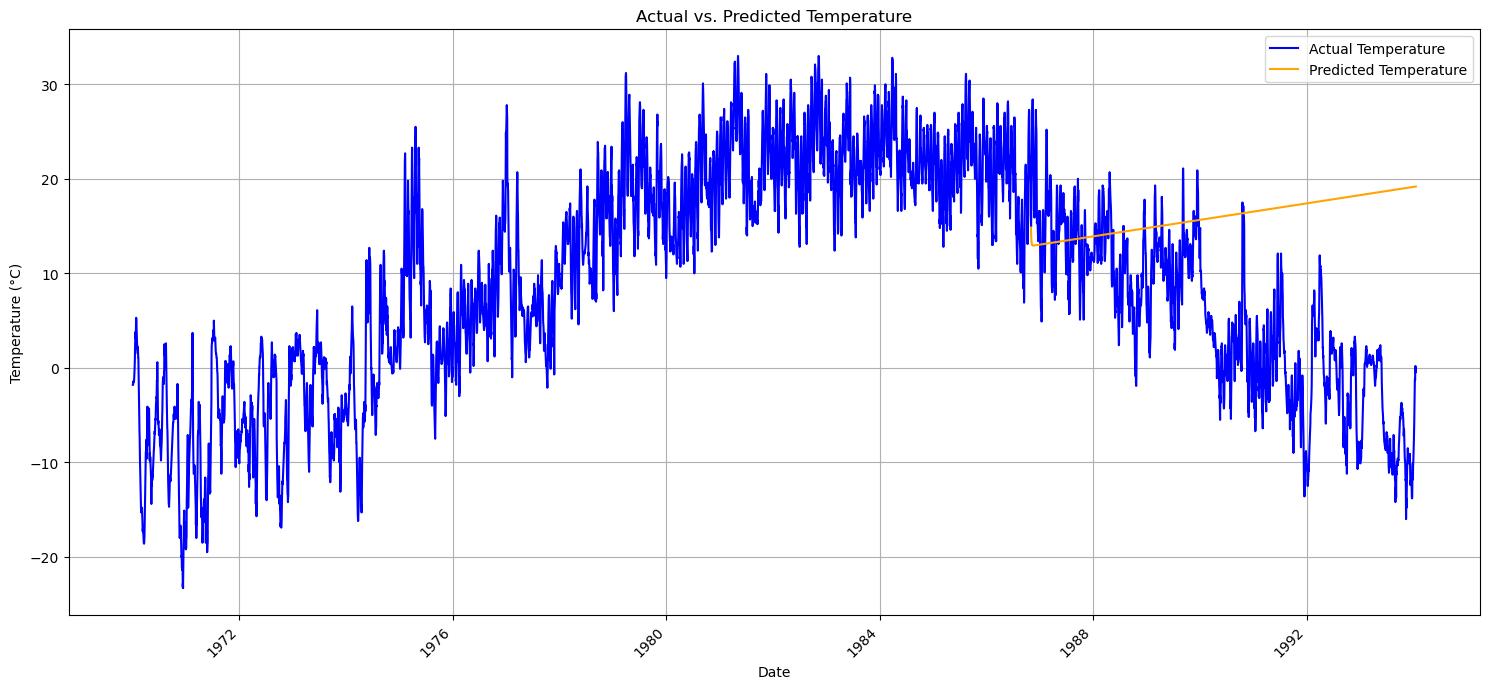

In [24]:
# Generate predictions for the full range of the test data
predictions = fitted_model.get_forecast(steps=len(test_data))
predictions = predictions.predicted_mean  # Get the predicted mean temperatures
# Plot actual vs. predicted values
plt.figure(figsize=(15, 7))
plt.plot(temperature.index, temperature, label='Actual Temperature', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Temperature', color='orange')

# Formatting date axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to fit everything
plt.show()


/Users/hassanabdelshafi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


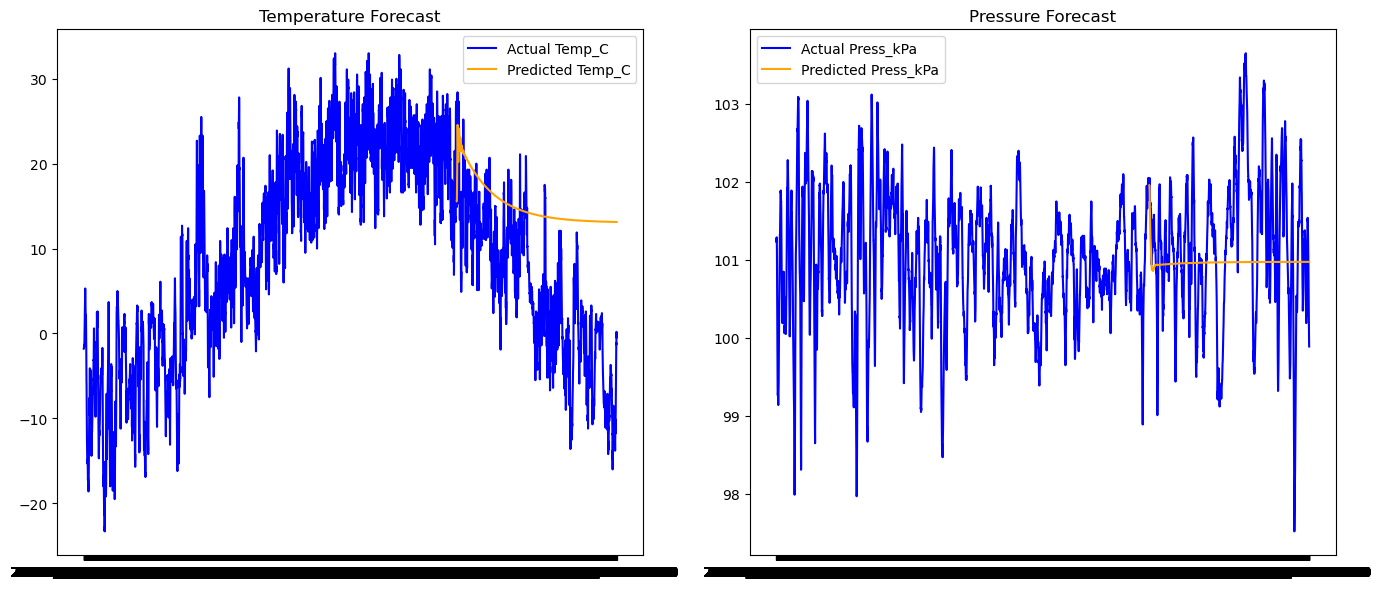

In [31]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Load the data
data = pd.read_excel('/Users/hassanabdelshafi/Downloads/Weather Data 2.xlsx', parse_dates=['Date/Time'], index_col='Date/Time')

# Data Preprocessing: Check for stationarity and make any data stationary if it is not
# For this example, we'll assume data is already stationary

# Encoding categorical 'Weather' data as numeric (optional)
data['Weather_Code'] = pd.factorize(data['Weather'])[0]

# Select only the numeric columns for VAR
data_numeric = data[['Temp_C', 'Press_kPa']]

# Split data into train and test sets
split_point = int(len(data_numeric) * 0.7)
train_data = data_numeric.iloc[:split_point]
test_data = data_numeric.iloc[split_point:]

# Step 2: Specify the VAR model
model = VAR(train_data)

# Step 3: Fit the VAR model, choose optimal lag with AIC
results = model.fit(maxlags=15, ic='aic')

# Step 4: Make predictions
forecast = results.forecast(train_data.values[-results.k_ar:], steps=len(test_data))

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Step 5: Visualization
plt.figure(figsize=(14, 6))

# Plot actual vs predicted values for Temperature
plt.subplot(1, 2, 1)
plt.plot(data_numeric.index, data_numeric['Temp_C'], label='Actual Temp_C', color='blue')
plt.plot(forecast_df.index, forecast_df['Temp_C'], label='Predicted Temp_C', color='orange')
plt.title('Temperature Forecast')
plt.legend()

# Plot actual vs predicted values for Pressure
plt.subplot(1, 2, 2)
plt.plot(data_numeric.index, data_numeric['Press_kPa'], label='Actual Press_kPa', color='blue')
plt.plot(forecast_df.index, forecast_df['Press_kPa'], label='Predicted Press_kPa', color='orange')
plt.title('Pressure Forecast')
plt.legend()

# Adjust the plot layout and show the plot
plt.tight_layout()
plt.show()


Evaluation metric results:
MSE is : 60.103294344145326
MAE is : 4.8381385904202885
RMSE is : 7.752631446428066
MAPE is : inf
R2 is : -0.36231868433094405



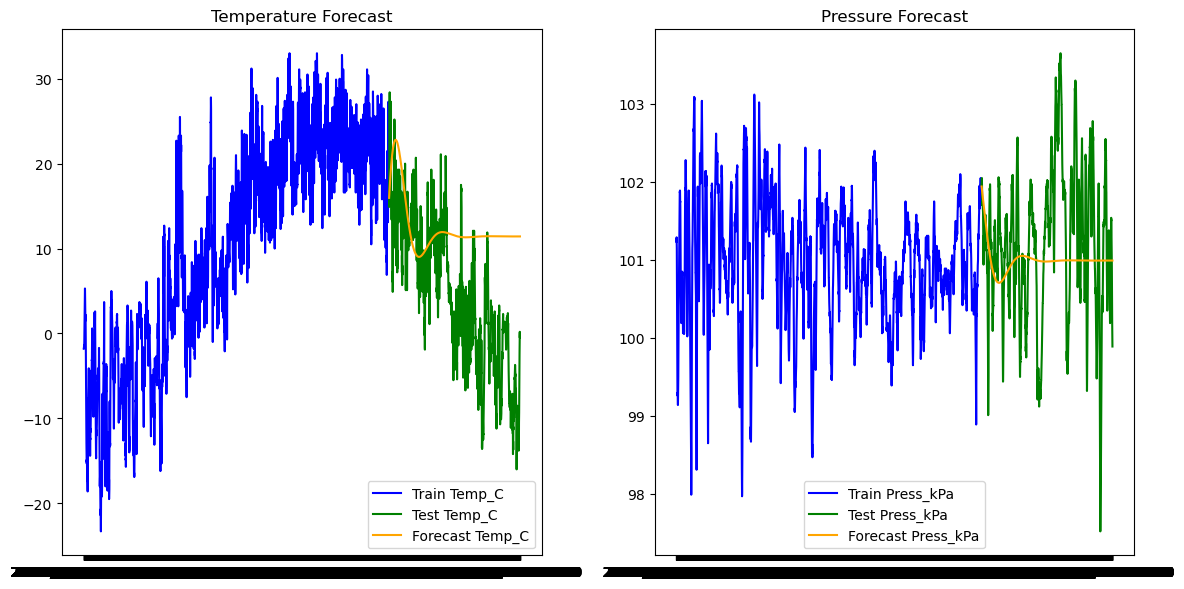

In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

warnings.filterwarnings("ignore")

# Define evaluation metrics function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def timeseries_evaluation_metrics_func(y_true, y_pred):
    print('Evaluation metric results:')
    print(f'MSE is : {mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {r2_score(y_true, y_pred)}', end='\n\n')

# Load the dataset
data = pd.read_excel('/Users/hassanabdelshafi/Downloads/Weather Data 2.xlsx', parse_dates=['Date/Time'], index_col='Date/Time')

# Preprocessing: Using 'Temp_C' and 'Press_kPa' for VARMAX
data = data[['Temp_C', 'Press_kPa']]

# Split data into train and test sets
split_point = int(len(data) * 0.7)
train_data = data.iloc[:split_point]
test_data = data.iloc[split_point:]

# Define and fit the VARMAX model (You might want to use different p and q values)
p = 1  # Autoregressive terms, you can change this based on model selection criteria
q = 1  # Moving Average terms, change this as well

model = VARMAX(train_data, order=(p, q), trend='c')
fitted_model = model.fit(disp=False)

# Forecast
forecast = fitted_model.get_forecast(steps=len(test_data))
forecast_df = forecast.predicted_mean

# Calculate and print evaluation metrics
timeseries_evaluation_metrics_func(test_data, forecast_df)

# Plotting the results
plt.figure(figsize=(12, 6))

# Temperature
plt.subplot(1, 2, 1)
plt.plot(train_data.index, train_data['Temp_C'], label='Train Temp_C', color='blue')
plt.plot(test_data.index, test_data['Temp_C'], label='Test Temp_C', color='green')
plt.plot(forecast_df.index, forecast_df['Temp_C'], label='Forecast Temp_C', color='orange')
plt.title('Temperature Forecast')
plt.legend()

# Pressure
plt.subplot(1, 2, 2)
plt.plot(train_data.index, train_data['Press_kPa'], label='Train Press_kPa', color='blue')
plt.plot(test_data.index, test_data['Press_kPa'], label='Test Press_kPa', color='green')
plt.plot(forecast_df.index, forecast_df['Press_kPa'], label='Forecast Press_kPa', color='orange')
plt.title('Pressure Forecast')
plt.legend()

plt.tight_layout()
plt.show()
